# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [50]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
# 設定 data_path
dir_data = 'C:/Users/rubychen/Documents/GitHub/2nd-ML100Days/data'

In [54]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/rubychen/Documents/GitHub/2nd-ML100Days/data\application_train.csv


FileNotFoundError: File b'C:/Users/rubychen/Documents/GitHub/2nd-ML100Days/data\\application_train.csv' does not exist

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [64]:
#1
cut_rule =[0,0.5,2.5,5.5,99] 

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 0.5]    215371
(0.5, 2.5]        87868
(2.5, 5.5]         4230
(5.5, 99.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [65]:
#2-1
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 0.5]       0         166747.010980
                    1         160804.210548
(0.5, 2.5]          0         174590.584401
                    1         176115.362720
(2.5, 5.5]          0         175053.742913
                    1         160677.385714
(5.5, 99.0]         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

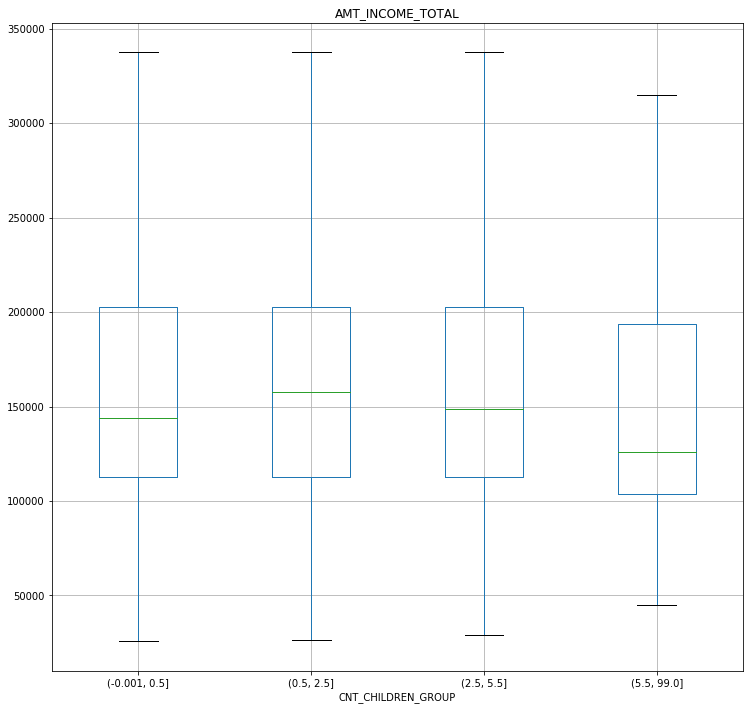

In [66]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column='AMT_INCOME_TOTAL', by = 'CNT_CHILDREN_GROUP', showfliers = False, figsize=(12,12))

plt.suptitle('')
plt.show()

In [68]:
#3
from scipy.stats import zscore
#grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL','TARGET']



#app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x : zscore(x,ddof=1))
#app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

#"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-np.mean(x))/np.std(x))